In [1]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.rcParams['lines.linewidth'] = 1.5
%matplotlib inline
from sklearn.ensemble import RandomForestRegressor
from skforecast.ForecasterAutoreg import ForecasterAutoreg

In [2]:
data = pd.read_csv(r'C:\Hotel_Reviews.csv', low_memory=False,delimiter=',', encoding='iso-8859-1', decimal='.')
data.head(5)

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,7.1,"[' Leisure trip ', ' Family with young childre...",3 days,52.360576,4.915968
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,3.8,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",3 days,52.360576,4.915968
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/24/2017,7.7,Hotel Arena,New Zealand,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,6.7,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",10 days,52.360576,4.915968


In [3]:
data['Review_Date'] = pd.to_datetime(data['Review_Date'], format='%m/%d/%Y')
data = data.set_index('Review_Date')
data = data.sort_index()
data.head(5)

,Hotel_Address,Additional_Number_of_Scoring,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng
Review_Date,,,,,,,,,,,,,,,,
2015-08-04,225 Edgware Road Westminster Borough London W2...,1485,7.5,Hilton London Metropole,United Kingdom,First day the swimming pool was not opened th...,54,6977,The hotel was clean and accessible,8,4,7.5,"[' Leisure trip ', ' Group ', ' Superior Queen...",730 day,51.519569,-0.170521
2015-08-04,7 Rue des Petits H tels 10th arr 75010 Paris F...,125,8.6,Hotel Mademoiselle,United Kingdom,No Negative,0,853,very good location breakfast was great,7,10,8.3,"[' Leisure trip ', ' Group ', ' Junior Suite '...",730 day,48.877249,2.354304
2015-08-04,Parkring 12a 01 Innere Stadt 1010 Vienna Austria,130,8.2,Vienna Marriott Hotel,Qatar,Nothing,2,939,It was very nice excellent hotel,7,4,10.0,"[' Family with young children ', ' Executive D...",730 day,48.205097,16.377093
2015-08-04,Europaboulevard 10 Zuideramstel 1083 AD Amster...,341,7.8,Novotel Amsterdam City,Austria,No Negative,0,2501,Slightly out of the city center but very easy...,27,34,9.6,"[' Leisure trip ', ' Group ', ' Standard Room ...",730 day,52.333803,4.888471
2015-08-04,Holland Park Avenue Kensington and Chelsea Lon...,843,7.8,Hilton London Kensington Hotel,Qatar,No Negative,0,3801,Great easy to reAch location,6,5,7.5,"[' Leisure trip ', ' Solo traveler ', ' Double...",730 day,51.505108,-0.213266


In [4]:
print(f'Linhas com valores nulos: {data.isnull().any(axis=1).mean()}')

Linhas com valores nulos: 0.006336550729246245


In [5]:
data_count = data.resample('D').size().to_frame(name='Review_Count')

# Preencher as datas vazias com o valor do dia anterior
data_count = data_count.asfreq('D').ffill()
data

,Hotel_Address,Additional_Number_of_Scoring,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng
Review_Date,,,,,,,,,,,,,,,,
2015-08-04,225 Edgware Road Westminster Borough London W2...,1485,7.5,Hilton London Metropole,United Kingdom,First day the swimming pool was not opened th...,54,6977,The hotel was clean and accessible,8,4,7.5,"[' Leisure trip ', ' Group ', ' Superior Queen...",730 day,51.519569,-0.170521
2015-08-04,7 Rue des Petits H tels 10th arr 75010 Paris F...,125,8.6,Hotel Mademoiselle,United Kingdom,No Negative,0,853,very good location breakfast was great,7,10,8.3,"[' Leisure trip ', ' Group ', ' Junior Suite '...",730 day,48.877249,2.354304
2015-08-04,Parkring 12a 01 Innere Stadt 1010 Vienna Austria,130,8.2,Vienna Marriott Hotel,Qatar,Nothing,2,939,It was very nice excellent hotel,7,4,10.0,"[' Family with young children ', ' Executive D...",730 day,48.205097,16.377093
2015-08-04,Europaboulevard 10 Zuideramstel 1083 AD Amster...,341,7.8,Novotel Amsterdam City,Austria,No Negative,0,2501,Slightly out of the city center but very easy...,27,34,9.6,"[' Leisure trip ', ' Group ', ' Standard Room ...",730 day,52.333803,4.888471
2015-08-04,Holland Park Avenue Kensington and Chelsea Lon...,843,7.8,Hilton London Kensington Hotel,Qatar,No Negative,0,3801,Great easy to reAch location,6,5,7.5,"[' Leisure trip ', ' Solo traveler ', ' Double...",730 day,51.505108,-0.213266
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-08-03,104 Bayswater Rd Westminster Borough London W2...,466,8.2,Thistle Kensington Gardens,Norway,Quite narrow double bed made it necessary to ...,21,2134,Air conditioning Perfect location by Kensingt...,20,3,8.8,"[' Leisure trip ', ' Family with young childre...",0 days,51.510844,-0.183907
2017-08-03,104 Bayswater Rd Westminster Borough London W2...,466,8.2,Thistle Kensington Gardens,South Africa,We had a family room with an extra bed the ma...,41,2134,It was in an excellent position and enjoyed w...,13,9,7.5,"[' Leisure trip ', ' Family with young childre...",0 days,51.510844,-0.183907
2017-08-03,104 Bayswater Rd Westminster Borough London W2...,466,8.2,Thistle Kensington Gardens,Bahrain,No Porter No security at entrance at ground f...,97,2134,Location,2,53,4.6,"[' Business trip ', ' Group ', ' Standard Doub...",0 days,51.510844,-0.183907


In [6]:
# data = data.asfreq('B')
# data = data.ffill()
# (data.index == pd.date_range(start=data.index.min(),
#                              end=data.index.max(),
#                              freq=data.index.freq)).all()

In [7]:
data_count

,Review_Count
Review_Date,
2015-08-04,1347
2015-08-05,422
2015-08-06,798
2015-08-07,345
2015-08-08,574
...,...
2017-07-30,568
2017-07-31,730
2017-08-01,638


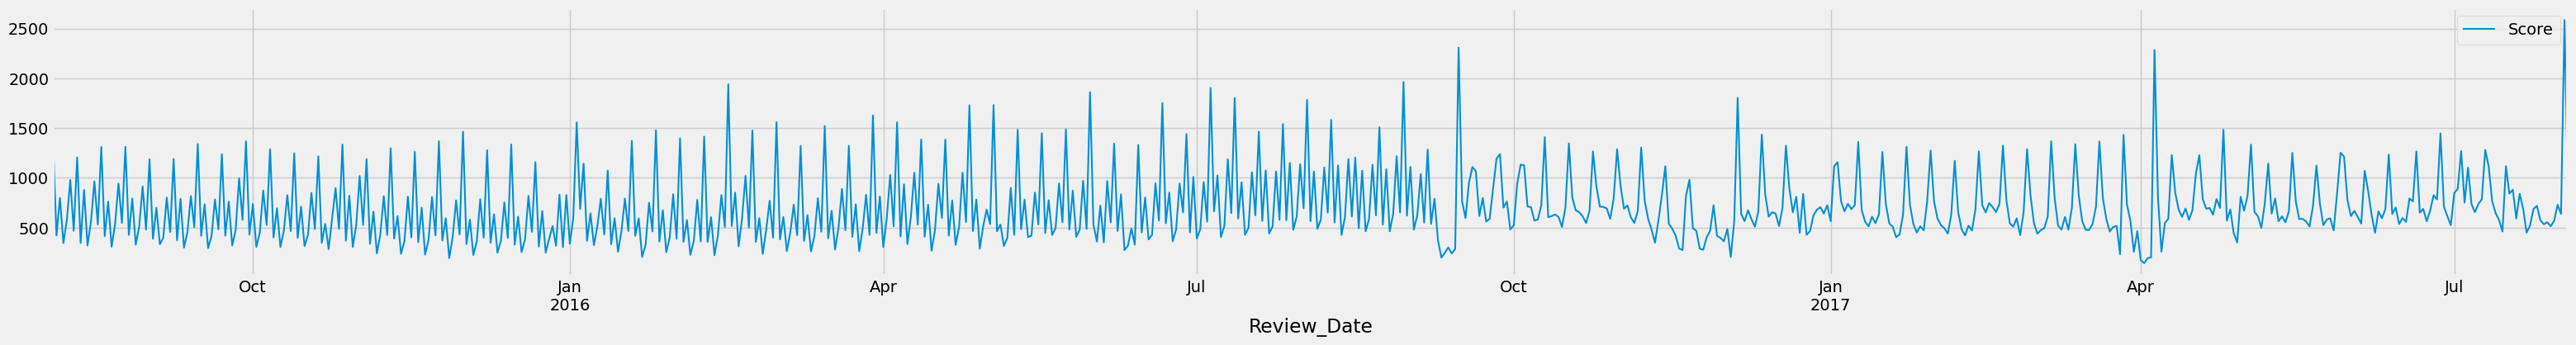

In [8]:
fig, ax = plt.subplots(figsize=(35, 4))
data_count['Review_Count'].plot(ax=ax, label='Score')
ax.legend()

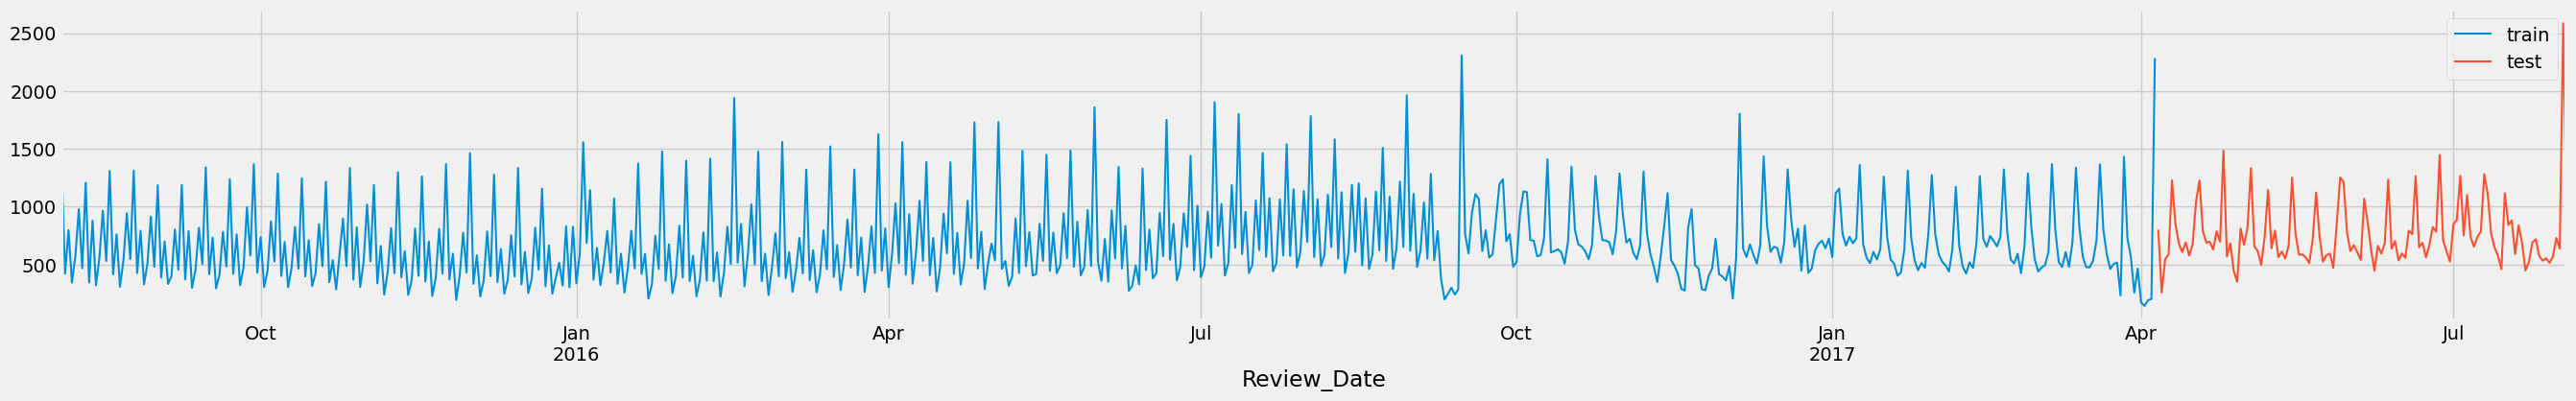

In [9]:
steps = 120
data_train = data_count[:-steps]
data_test  = data_count[-steps:]

fig, ax = plt.subplots(figsize=(30, 4))
data_train['Review_Count'].plot(ax=ax, label='train')
data_test['Review_Count'].plot(ax=ax, label='test')
ax.legend()

In [15]:
forecaster = ForecasterAutoreg(
                regressor = RandomForestRegressor(max_depth=100, n_estimators=500, random_state=123),
                lags      = 14
             )

forecaster.fit(y=data_train['Review_Count'])

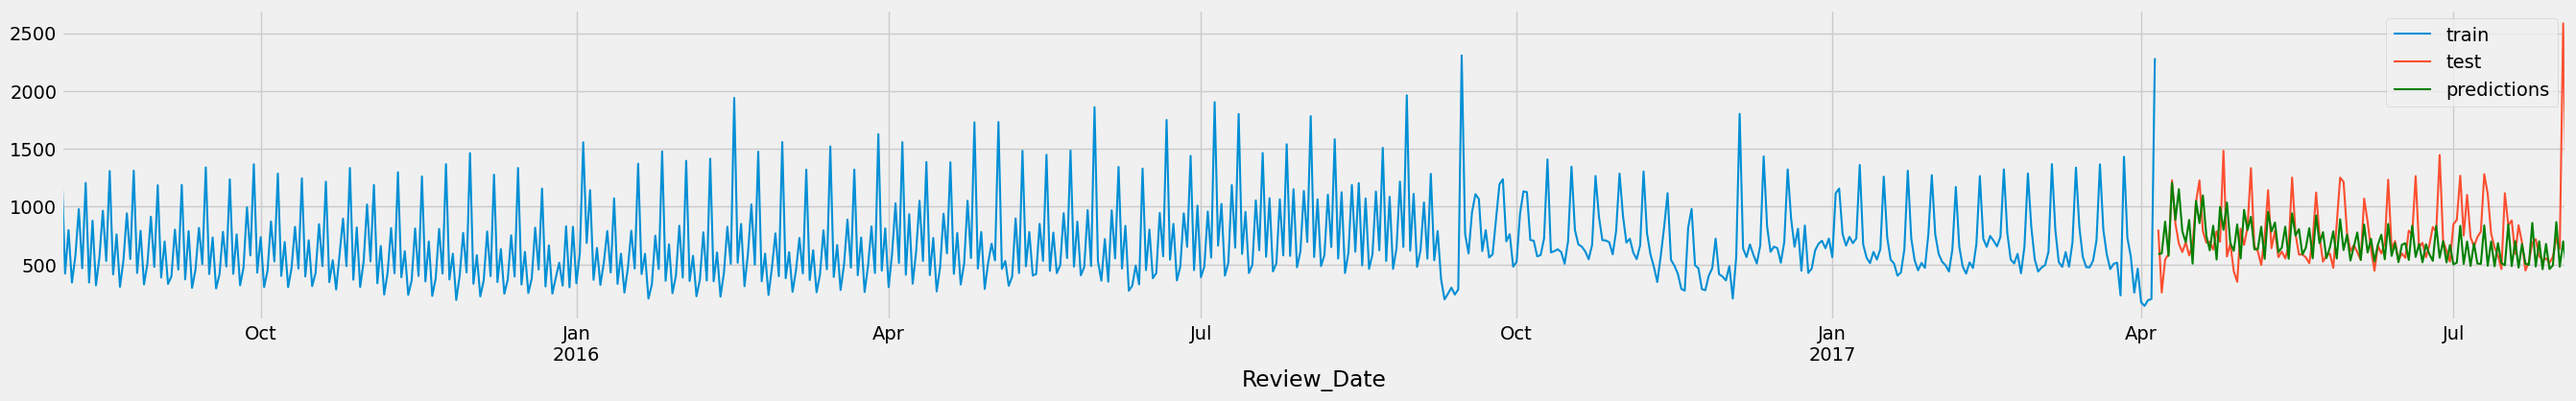

In [16]:
predictions = forecaster.predict(steps=steps)

# Plotar os resultados
fig, ax = plt.subplots(figsize=(30, 4))
data_train['Review_Count'].plot(ax=ax, label='train')
data_test['Review_Count'].plot(ax=ax, label='test')
predictions.plot(ax=ax, label='predictions', color='green')
ax.legend()
plt.show()